In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from ggplot import ggplot, aes, geom_point, geom_line
import ggplot as gg

import numpy as np
import pandas as pd
from itertools import product


from thinkbayes2 import Pmf, Cdf, Suite, Joint, MakeNormalPmf, EvalNormalPdf
import thinkplot
import os

In [2]:
%%bash
wget https://www.ssa.gov/oact/babynames/state/namesbystate.zip -P Datasets/
cd Datasets
unzip namesbystate.zip

Archive:  namesbystate.zip


--2016-11-14 12:08:15--  https://www.ssa.gov/oact/babynames/state/namesbystate.zip
Resolving www.ssa.gov (www.ssa.gov)... 137.200.4.16, 2001:1930:e03::aaaa
Connecting to www.ssa.gov (www.ssa.gov)|137.200.4.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24444630 (23M) [application/zip]
Saving to: ‘Datasets/namesbystate.zip.1’

     0K .......... .......... .......... .......... ..........  0%  641K 37s
    50K .......... .......... .......... .......... ..........  0%  821K 33s
   100K .......... .......... .......... .......... ..........  0% 10.8M 23s
   150K .......... .......... .......... .......... ..........  0% 1.54M 21s
   200K .......... .......... .......... .......... ..........  1% 1.47M 20s
   250K .......... .......... .......... .......... ..........  1% 1.63M 19s
   300K .......... .......... .......... .......... ..........  1% 1.48M 18s
   350K .......... .......... .......... .......... ..........  1% 1.51M 18s
   400K .......... .......

In [3]:
dfs = []
for fname in os.listdir("Datasets/"):
    if not fname.endswith("TXT"):
        continue
    df = pd.read_csv("Datasets/"+fname, header=None)
    dfs.append(df)
    
df = pd.concat(dfs, ignore_index=True)
del(dfs)
df.columns = ["state", "gender", "year", "name", "num_named"]

df = df.head(100000)
print(len(df))

100000


In [4]:
year_pop = {}
probs = []
for y, data in df.groupby("year"):
    year_pop[y]=sum(data.num_named)
for i, row in df.iterrows():
    probs.append(row.num_named/year_pop[row.year])
df["probs"] = probs

In [5]:
df.head()

,state,gender,year,name,num_named,probs
0,GA,F,1910,Mary,841,0.034202
1,GA,F,1910,Annie,553,0.022490
2,GA,F,1910,Mattie,320,0.013014
3,GA,F,1910,Ruby,279,0.011347
4,GA,F,1910,Willie,275,0.011184


In [9]:
class NameDater(Suite):
    def __init__(self, df):
        self.df = df
        Suite.__init__(self, set(df.year))
    def Likelihood(self, data, hypo):
        year = hypo
        name = data
        df_data = df[df.year == year]
        df_data = df_data[df_data.name == name]
        
        return float(sum(df_data.probs))

In [12]:
N = NameDater(df)
N.Update("Willie")
N.Print()

1910 0.04958410095956466
1911 0.04582990373946028
1912 0.04324922863664384
1913 0.04184502190154837
1914 0.041814324188350696
1915 0.03997443983257726
1916 0.0391062372953221
1917 0.039418309765633264
1918 0.03873161323548999
1919 0.03988058329184685
1920 0.03794166851513999
1921 0.03669755809323079
1922 0.022087528541057156
1923 0.024567898180725425
1924 0.021070374530495643
1925 0.02282940860660057
1926 0.024647740143532312
1927 0.023616207597316422
1928 0.020380663265943542
1929 0.02334412675588405
1930 0.021021913556884465
1931 0.018041467701209433
1932 0.01746247367541701
1933 0.01683024159196195
1934 0.014927834395563255
1935 0.01729767591334043
1936 0.015487447074074635
1937 0.015387022920060965
1938 0.012834954149465451
1939 0.013168726085665487
1940 0.012362838073683723
1941 0.012458456564775339
1942 0.012360387284500568
1943 0.01125808647592598
1944 0.01018373805404989
1945 0.01073196010395082
1946 0.008526935444552089
1947 0.00801154303998917
1948 0.008588405338095672
1949 0

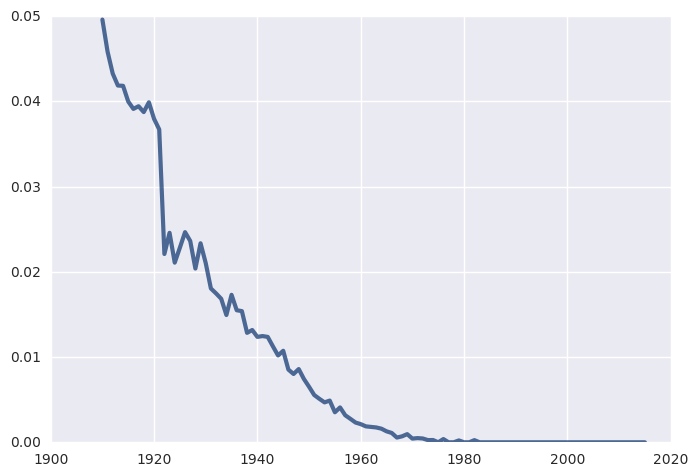

In [13]:
thinkplot.Pdf(N)